In [1]:
import pandas as pd
import numpy as np

In [4]:
ads = pd.read_csv('../DataSets/Advertising.csv')

In [6]:
mtv, btv = np.polyfit(ads['TV'], ads['Sales'], 1)
mradio, bradio = np.polyfit(ads['Radio'], ads['Sales'], 1)
mnews, bnews = np.polyfit(ads['Newspaper'], ads['Sales'], 1)

In [8]:
A = np.array([ads['TV'].to_numpy(), ads['Radio'].to_numpy(), ads['Newspaper'].to_numpy(), np.ones(len(ads['TV']))]).T
AtA = A.T@A; Aty = A.T@(ads['Sales'].to_numpy())
allreg = np.linalg.inv(AtA)@Aty

In [9]:
allreg

array([ 4.57646455e-02,  1.88530017e-01, -1.03749304e-03,  2.93888937e+00])

In [11]:
mtv, mradio, mnews

(np.float64(0.04753664043301972),
 np.float64(0.2024957833924398),
 np.float64(0.054693098472273216))

In [15]:
btv

np.float64(7.032593549127696)

In [ ]:
college = pd.read_csv('../../DataSets/College.csv')

In [9]:
college.columns

Index(['School', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni',
       'Expend', 'Grad_Rate'],
      dtype='object')

In [13]:
college.head()

,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [17]:
college['Accept_perc'] = college['Accept']/college['Apps']
college['Accept_perc'].max()

np.float64(1.0)

In [22]:
college['Accept_perc'] *= 100

In [23]:
college['F_Undergrad_perc'] = 100*(college['F_Undergrad']/(college['F_Undergrad'] + college['P_Undergrad']))
college['P_Undergrad_perc'] = 100*(college['P_Undergrad']/(college['F_Undergrad'] + college['P_Undergrad']))

In [25]:
college.head()

,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,...,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,Accept_perc,F_Undergrad_perc,P_Undergrad_perc
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,...,2200,70,78,18.1,12,7041,60,74.216867,84.307423,15.692577
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,...,1500,29,30,12.2,16,10527,56,88.014639,68.618926,31.381074
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,...,1165,53,66,12.9,30,8735,54,76.820728,91.277533,8.722467
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,...,875,92,97,7.7,37,19016,59,83.693046,89.005236,10.994764
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,...,1500,76,72,11.9,2,10922,15,75.647668,22.271914,77.728086


array([[<Axes: xlabel='Accept_perc', ylabel='Accept_perc'>,
        <Axes: xlabel='Top10perc', ylabel='Accept_perc'>,
        <Axes: xlabel='Top25perc', ylabel='Accept_perc'>,
        <Axes: xlabel='PhD', ylabel='Accept_perc'>,
        <Axes: xlabel='S_F_Ratio', ylabel='Accept_perc'>,
        <Axes: xlabel='perc_alumni', ylabel='Accept_perc'>,
        <Axes: xlabel='Grad_Rate', ylabel='Accept_perc'>],
       [<Axes: xlabel='Accept_perc', ylabel='Top10perc'>,
        <Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Top25perc', ylabel='Top10perc'>,
        <Axes: xlabel='PhD', ylabel='Top10perc'>,
        <Axes: xlabel='S_F_Ratio', ylabel='Top10perc'>,
        <Axes: xlabel='perc_alumni', ylabel='Top10perc'>,
        <Axes: xlabel='Grad_Rate', ylabel='Top10perc'>],
       [<Axes: xlabel='Accept_perc', ylabel='Top25perc'>,
        <Axes: xlabel='Top10perc', ylabel='Top25perc'>,
        <Axes: xlabel='Top25perc', ylabel='Top25perc'>,
        <Axes: xlabel='PhD', ylabe

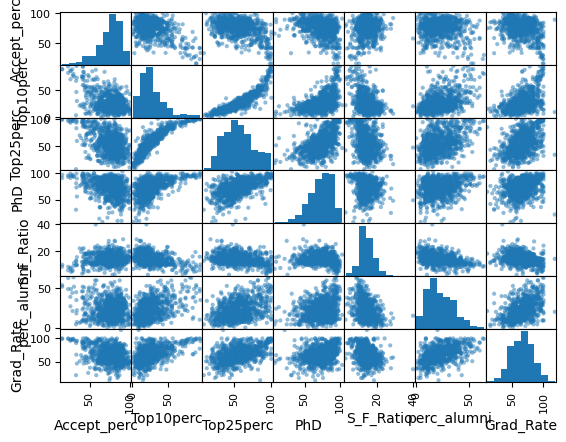

In [26]:
pd.plotting.scatter_matrix(college[['Accept_perc', 'Top10perc', 'Top25perc', 'PhD', 'S_F_Ratio', 'perc_alumni', 'Grad_Rate']])

In [54]:
big_college = college[college['Apps']>2500]
private_college = college[college['Private']=='Yes']

In [55]:
big_college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,Accept_perc,F_Undergrad_perc,P_Undergrad_perc
count,268.00000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,6662.58209,4265.940299,1620.208955,33.742537,63.361940,7998.250000,1647.279851,10715.511194,4592.720149,580.847015,1543.843284,81.723881,87.458955,14.794403,21.283582,11309.037313,68.261194,65.988031,85.322541,14.677459
std,4720.61886,3048.527508,1159.007641,22.162934,21.057607,6154.583134,2240.597755,4988.642774,1202.652029,180.195241,742.595109,11.244236,10.181968,4.500712,13.200903,7300.353141,18.322712,16.548368,11.476964,11.476964
min,2519.00000,992.000000,232.000000,2.000000,14.000000,908.000000,3.000000,2340.000000,1780.000000,96.000000,300.000000,22.000000,43.000000,2.900000,0.000000,3605.000000,10.000000,15.448631,43.043456,0.189036
25%,3547.50000,2313.500000,755.250000,16.000000,48.750000,3335.500000,297.500000,6612.750000,3675.000000,500.000000,1000.000000,75.000000,82.000000,11.575000,11.000000,6718.500000,55.000000,56.220095,80.022713,6.009634
50%,5088.00000,3287.500000,1261.000000,27.000000,62.000000,5884.000000,1068.500000,8842.000000,4440.000000,570.000000,1428.000000,83.500000,90.000000,15.250000,17.500000,9079.500000,67.000000,68.674244,87.753166,12.246834
75%,8288.00000,5265.500000,2094.750000,45.250000,81.250000,11067.000000,1913.000000,15160.500000,5582.500000,642.500000,1988.750000,90.000000,95.000000,18.100000,29.000000,13726.000000,83.000000,78.031624,93.990366,19.977287
max,48094.00000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,20100.000000,7425.000000,2000.000000,6800.000000,99.000000,100.000000,25.300000,64.000000,56233.000000,118.000000,96.074189,99.810964,56.956544


array([[<Axes: xlabel='Accept_perc', ylabel='Accept_perc'>,
        <Axes: xlabel='perc_alumni', ylabel='Accept_perc'>,
        <Axes: xlabel='Grad_Rate', ylabel='Accept_perc'>],
       [<Axes: xlabel='Accept_perc', ylabel='perc_alumni'>,
        <Axes: xlabel='perc_alumni', ylabel='perc_alumni'>,
        <Axes: xlabel='Grad_Rate', ylabel='perc_alumni'>],
       [<Axes: xlabel='Accept_perc', ylabel='Grad_Rate'>,
        <Axes: xlabel='perc_alumni', ylabel='Grad_Rate'>,
        <Axes: xlabel='Grad_Rate', ylabel='Grad_Rate'>]], dtype=object)

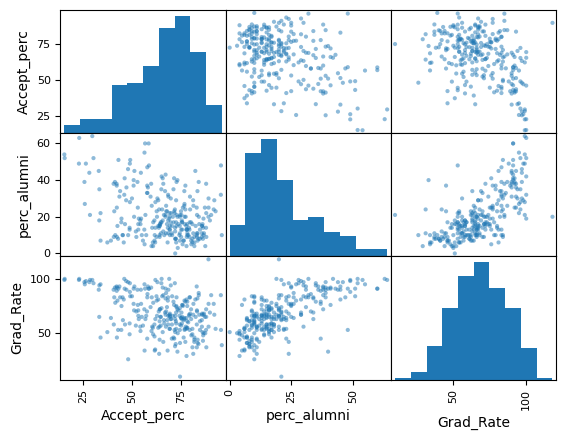

In [56]:
pd.plotting.scatter_matrix(big_college[['Accept_perc', 'perc_alumni', 'Grad_Rate']])

In [39]:
private_college[private_college['perc_alumni']>35].describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,Accept_perc,F_Undergrad_perc,P_Undergrad_perc
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,2633.631148,1391.516393,520.303279,42.721311,70.336066,2032.196721,169.500000,14483.713115,4939.688525,548.065574,1012.918033,81.442623,87.893443,11.400000,43.516393,14287.491803,77.778689,68.758523,89.458430,10.541570
std,2938.466692,1065.240595,557.577003,21.845915,19.159017,2846.657314,244.205145,3920.679020,1035.202827,157.859114,416.022858,13.884440,11.708447,2.876235,6.698012,7797.052329,15.420557,19.688359,15.123670,15.123670
min,150.000000,130.000000,46.000000,5.000000,21.000000,199.000000,1.000000,2340.000000,2700.000000,300.000000,300.000000,32.000000,37.000000,3.300000,36.000000,5073.000000,21.000000,15.448631,22.742857,0.058651
25%,824.000000,644.500000,226.250000,27.250000,56.000000,826.500000,30.000000,11416.000000,4135.000000,467.500000,750.000000,74.250000,82.000000,9.900000,38.000000,9291.750000,70.000000,56.555579,88.378019,1.687545
50%,1683.500000,1085.000000,401.500000,36.500000,70.500000,1378.000000,72.000000,14655.000000,4772.500000,500.000000,942.500000,83.500000,91.500000,11.350000,41.500000,12200.500000,80.000000,73.998829,95.555732,4.444268
75%,3009.000000,1794.250000,564.250000,56.000000,85.750000,2010.500000,209.500000,18478.750000,5797.500000,600.000000,1227.500000,92.750000,96.000000,12.800000,47.750000,16510.250000,90.000000,84.695523,98.312455,11.621981
max,13865.000000,5402.000000,4615.000000,95.000000,100.000000,27378.000000,1569.000000,19960.000000,7400.000000,1495.000000,2740.000000,100.000000,100.000000,20.500000,64.000000,56233.000000,100.000000,98.924731,99.941349,77.257143


In [40]:
endow_college = private_college[private_college['perc_alumni']>35]

array([[<Axes: xlabel='Accept_perc', ylabel='Accept_perc'>,
        <Axes: xlabel='Top10perc', ylabel='Accept_perc'>,
        <Axes: xlabel='Top25perc', ylabel='Accept_perc'>,
        <Axes: xlabel='PhD', ylabel='Accept_perc'>,
        <Axes: xlabel='S_F_Ratio', ylabel='Accept_perc'>,
        <Axes: xlabel='perc_alumni', ylabel='Accept_perc'>,
        <Axes: xlabel='Grad_Rate', ylabel='Accept_perc'>],
       [<Axes: xlabel='Accept_perc', ylabel='Top10perc'>,
        <Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Top25perc', ylabel='Top10perc'>,
        <Axes: xlabel='PhD', ylabel='Top10perc'>,
        <Axes: xlabel='S_F_Ratio', ylabel='Top10perc'>,
        <Axes: xlabel='perc_alumni', ylabel='Top10perc'>,
        <Axes: xlabel='Grad_Rate', ylabel='Top10perc'>],
       [<Axes: xlabel='Accept_perc', ylabel='Top25perc'>,
        <Axes: xlabel='Top10perc', ylabel='Top25perc'>,
        <Axes: xlabel='Top25perc', ylabel='Top25perc'>,
        <Axes: xlabel='PhD', ylabe

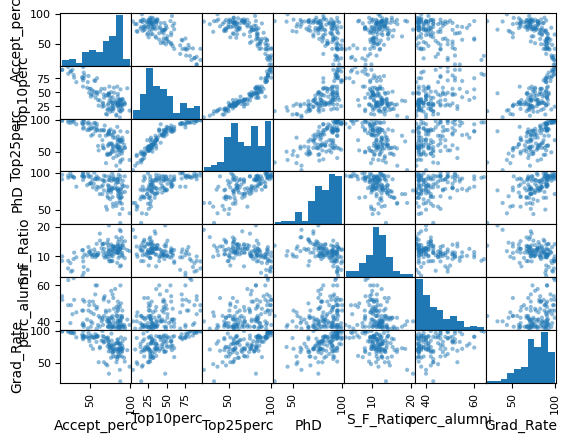

In [41]:
pd.plotting.scatter_matrix(endow_college[['Accept_perc', 'Top10perc', 'Top25perc', 'PhD', 'S_F_Ratio', 'perc_alumni', 'Grad_Rate']])

In [57]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('darkgrid')

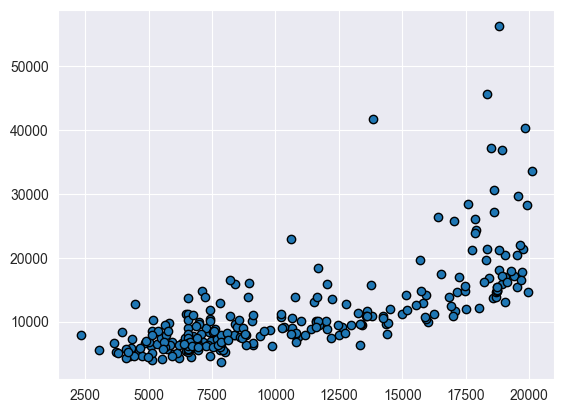

In [58]:
plt.scatter(big_college['Outstate'], big_college['Expend'], edgecolors='black')
plt.show()

In [59]:
alumni = big_college['perc_alumni'].to_numpy()
accept = big_college['Accept_perc'].to_numpy()
sfratio = big_college['S_F_Ratio'].to_numpy()
gradrate = big_college['Grad_Rate'].to_numpy()
oostuition = big_college['Outstate'].to_numpy()
expend = big_college['Expend'].to_numpy()

In [112]:
full = big_college['F_Undergrad_perc'].to_numpy()

In [61]:
big_college['Elite'] = pd.cut(big_college['Top10perc'], [0, 50, 100], labels=['No','Yes'])

C:\Users\gener\AppData\Local\Temp\ipykernel_25180\2710244741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_college['Elite'] = pd.cut(big_college['Top10perc'], [0, 50, 100], labels=['No','Yes'])


In [63]:
big_college['Elite'].value_counts()

Elite
No     217
Yes     51
Name: count, dtype: int64

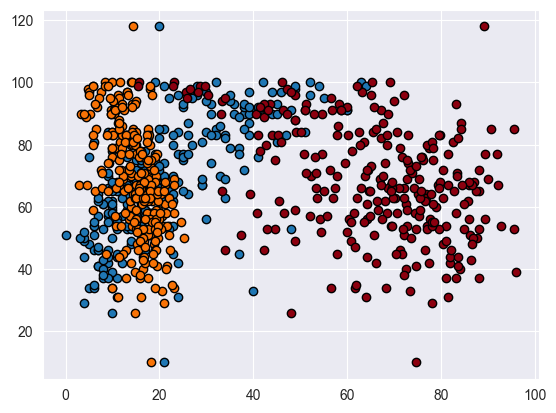

In [78]:
plt.scatter(alumni, gradrate, edgecolors='black')
plt.scatter(sfratio, gradrate, c='xkcd:orange', edgecolors='black')
plt.scatter(accept, gradrate, c='xkcd:crimson', edgecolors='black')
plt.show()

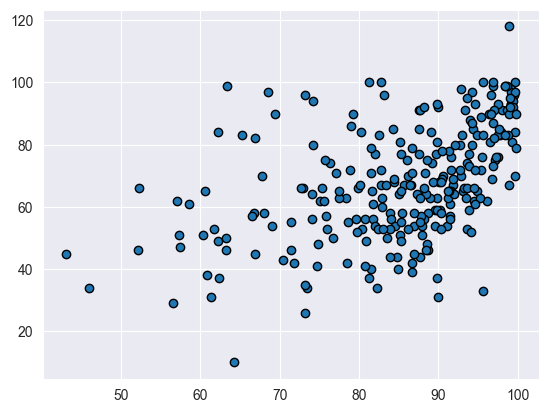

In [114]:
plt.scatter(full, gradrate, edgecolors='black')
plt.show()

In [80]:
import numpy as np

In [88]:
Malum, Balum = np.polyfit(alumni, gradrate, 1)
Msf, Bsf = np.polyfit(sfratio, gradrate, 1)
Maccept, Baccept = np.polyfit(accept, gradrate, 1)

In [104]:
Mex, Bex = np.polyfit(expend, gradrate, 1)

In [115]:
Mfull, Bfull = np.polyfit(full, gradrate, 1)

In [82]:
def rsquared(ys, xs, mhat, bhat):
    ybar = np.mean(ys)
    tss = np.sum((ys - ybar)**2)
    rss = np.sum((ys - mhat*xs - bhat)**2)
    return 1 - rss/tss

In [89]:
rsquared(gradrate, alumni, Malum, Balum)

np.float64(0.4412122029728329)

In [90]:
rsquared(gradrate, sfratio, Msf, Bsf)

np.float64(0.265090447760411)

In [91]:
rsquared(gradrate, accept, Maccept, Baccept)

np.float64(0.16867391877557747)

In [105]:
rsquared(gradrate, expend, Mex, Bex)

np.float64(0.2760207809517017)

In [116]:
rsquared(gradrate, full, Mfull, Bfull)

np.float64(0.24619713350851413)

In [92]:
A = np.array([sfratio, alumni, np.ones(len(alumni))]).T

In [95]:
AtA = A.T@A; Aty = A.T@gradrate
twovar = np.linalg.inv(AtA)@Aty

In [98]:
gbar = np.mean(gradrate)
gtss = np.sum((gradrate - gbar)**2)

In [99]:
grss = np.sum((gradrate - twovar[0]*sfratio - twovar[1]*alumni - twovar[2])**2)
print(1 - grss/gtss)

0.48474892149277815


In [117]:
A = np.array([expend, sfratio, alumni, np.ones(len(alumni))]).T
AtA = A.T@A; Aty = A.T@gradrate
threevar = np.linalg.inv(AtA)@Aty

In [118]:
grss = np.sum((gradrate - threevar[0]*expend - threevar[1]*sfratio - threevar[2]*alumni - threevar[3])**2)
print(1 - grss/gtss)

0.49251580521758875


In [110]:
A = np.array([accept, sfratio, np.ones(len(alumni))]).T
AtA = A.T@A; Aty = A.T@gradrate
twovar2 = np.linalg.inv(AtA)@Aty

In [111]:
grss = np.sum((gradrate - twovar2[0]*accept - twovar2[1]*sfratio - twovar2[2])**2)
print(1 - grss/gtss)

0.32924681569863445
